In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-price-prediction/Real estate.csv


In [2]:
from utilityscript2 import *

Directory 'my_dir/neural_net_tuning' does not exist.


In [3]:
fn = CommonUtils.get_files()
fn

/kaggle/input/real-estate-price-prediction/Real estate.csv


['/kaggle/input/real-estate-price-prediction/Real estate.csv']

In [4]:
org_df = pd.read_csv(fn[0])
org_df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
org_df = org_df.drop('No', axis=1)

In [6]:
org_df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


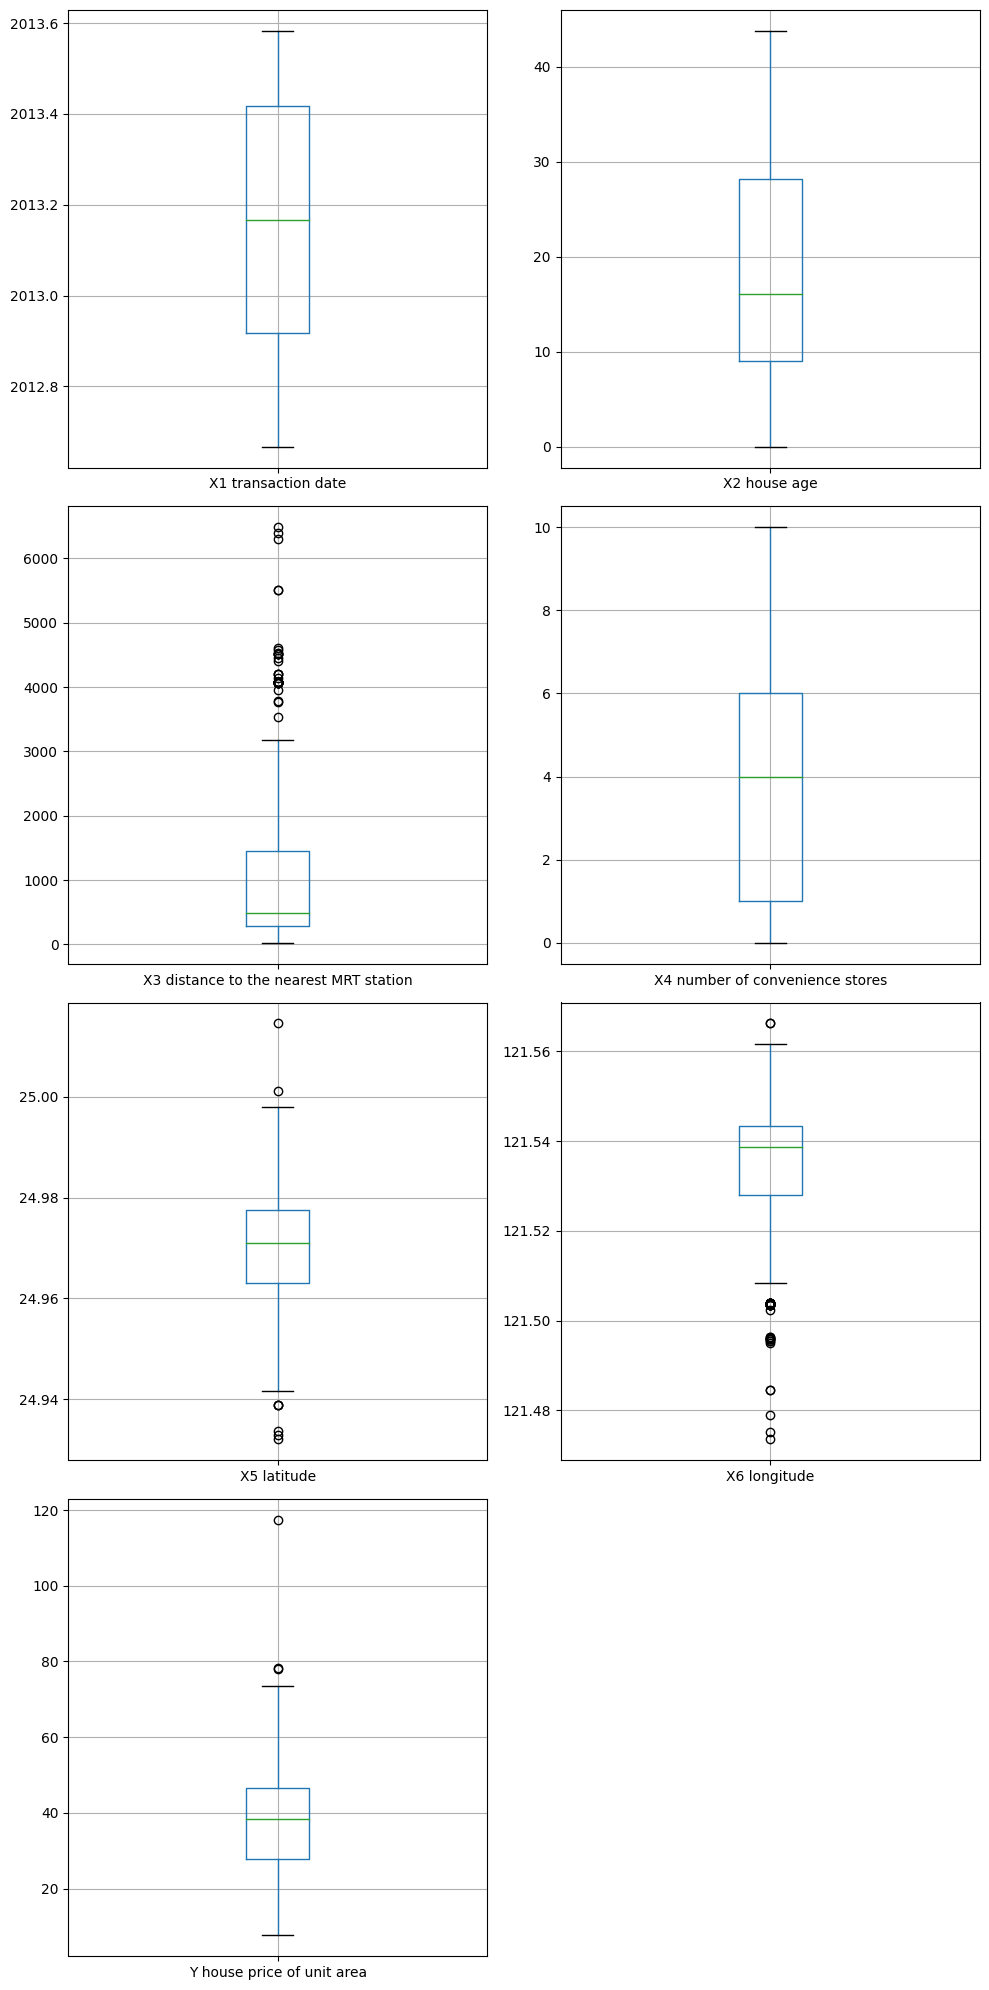

In [7]:
# Number of columns per row
cols_per_row = 2
num_cols = len(org_df.columns)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(10, num_rows * 5))

for i, col in enumerate(org_df.columns):
    row = i // cols_per_row
    col_pos = i % cols_per_row
    org_df.boxplot(column=col, ax=axes[row, col_pos])

# Hide any empty subplots
for j in range(i + 1, num_rows * cols_per_row):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


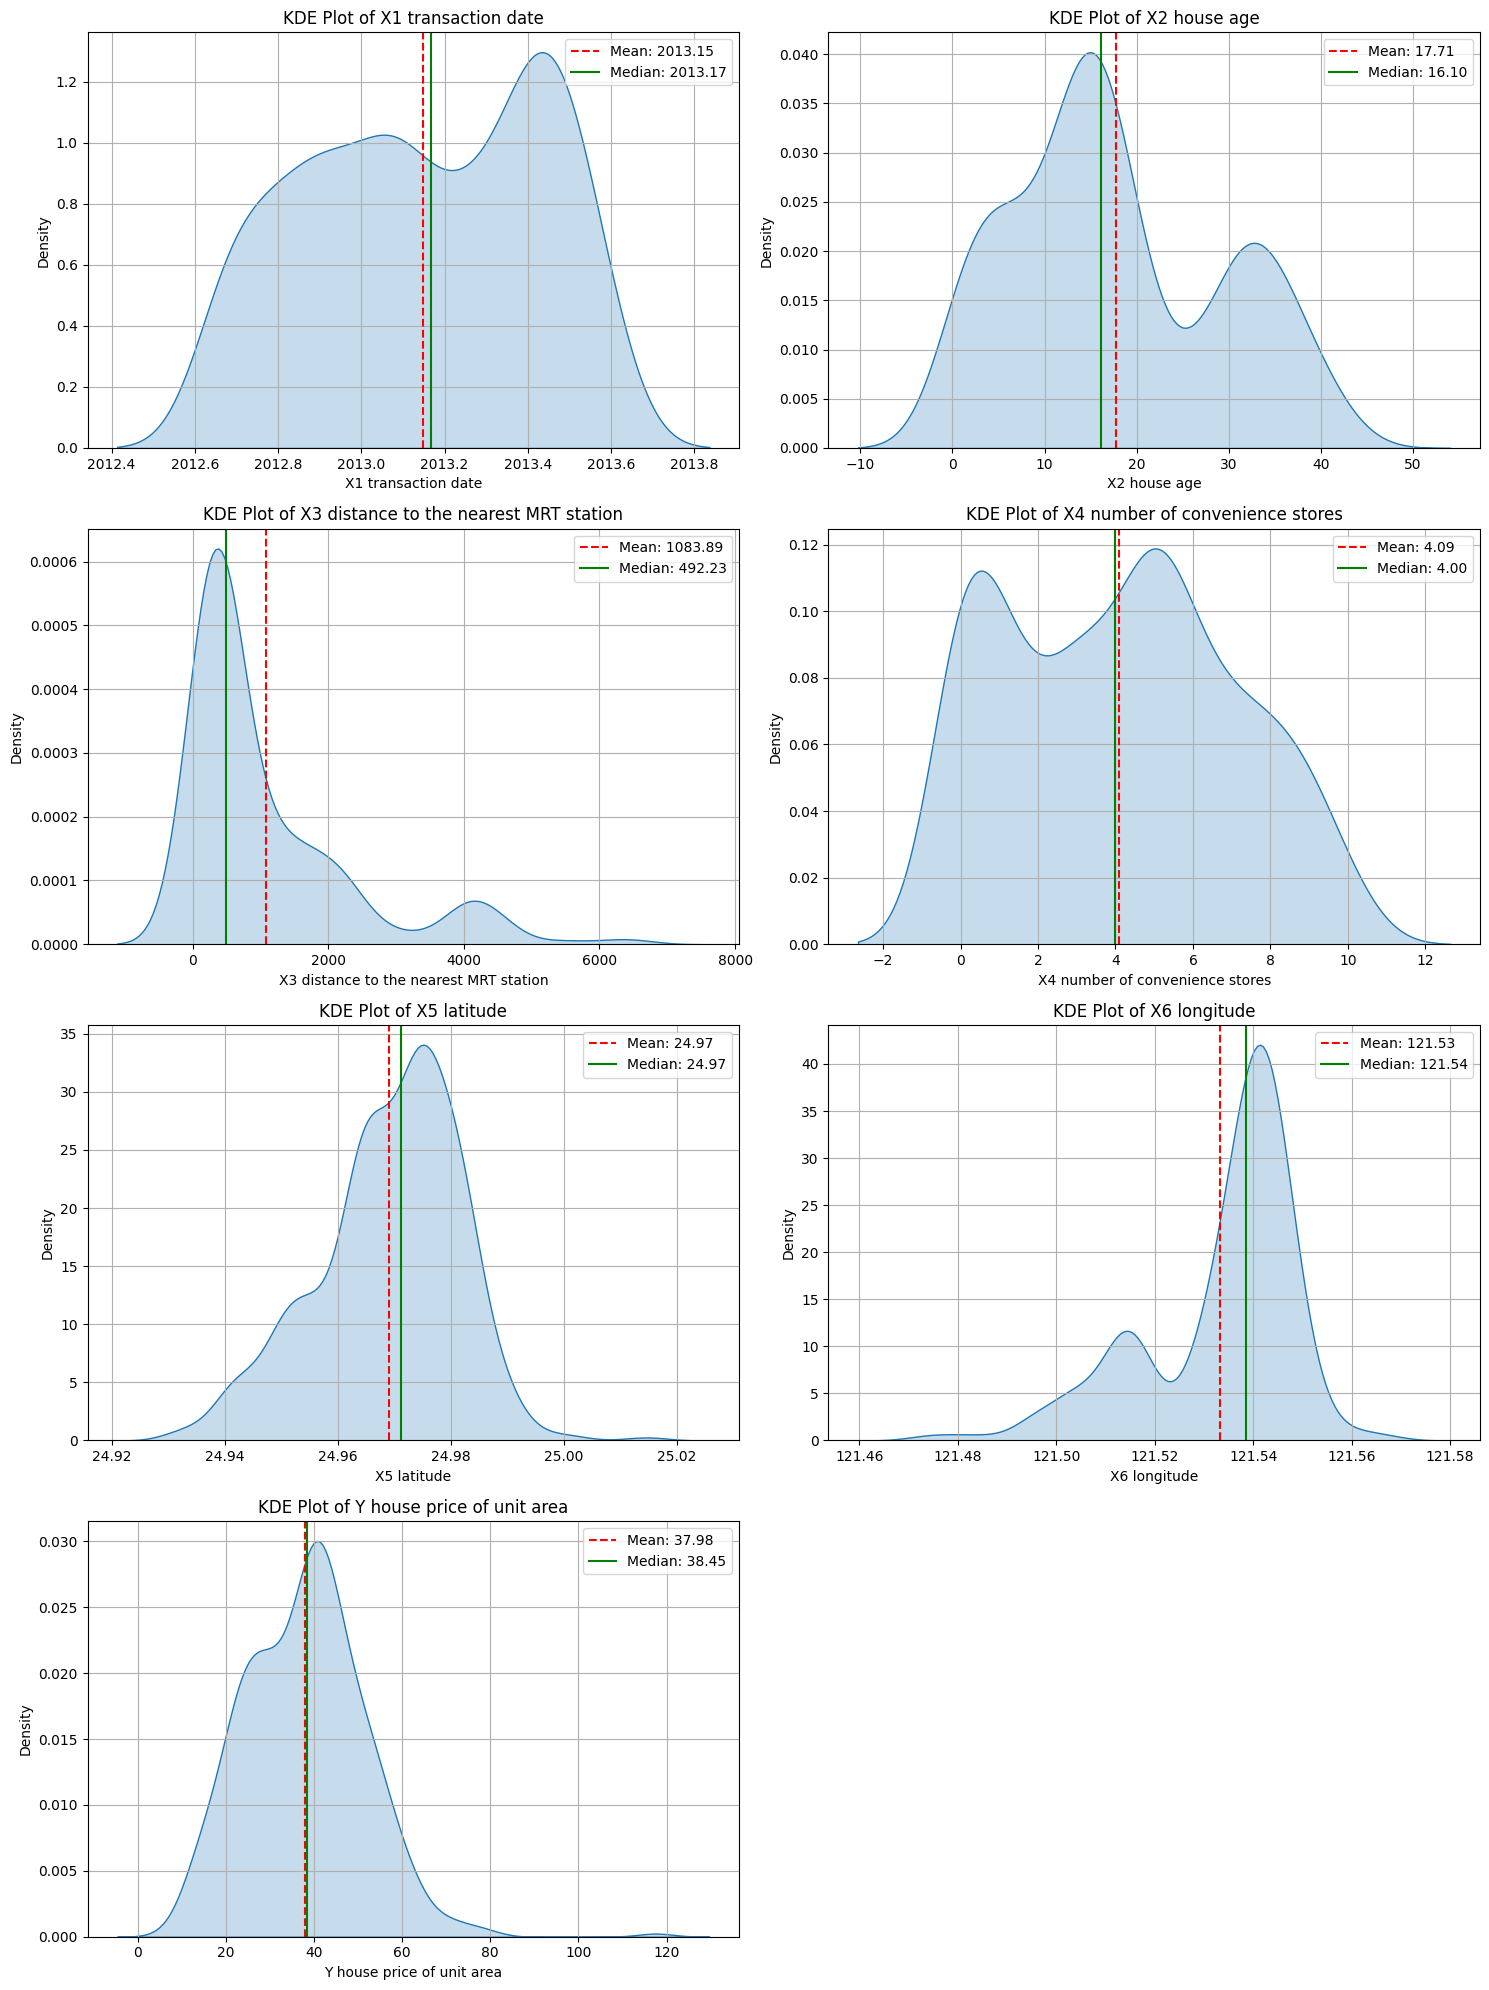

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame
# org_df = pd.read_csv('your_data.csv')  # Load your DataFrame

# Replace infinite values with NaN
org_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Number of columns to plot
columns = org_df.columns
num_columns = len(columns)

# Determine the number of rows needed
num_rows = (num_columns + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot KDE for each column
for i, col in enumerate(columns):
    sns.kdeplot(data=org_df, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f'KDE Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].grid(True)
    # Add annotations for mean and median
    mean_val = org_df[col].mean()
    median_val = org_df[col].median()
    axes[i].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


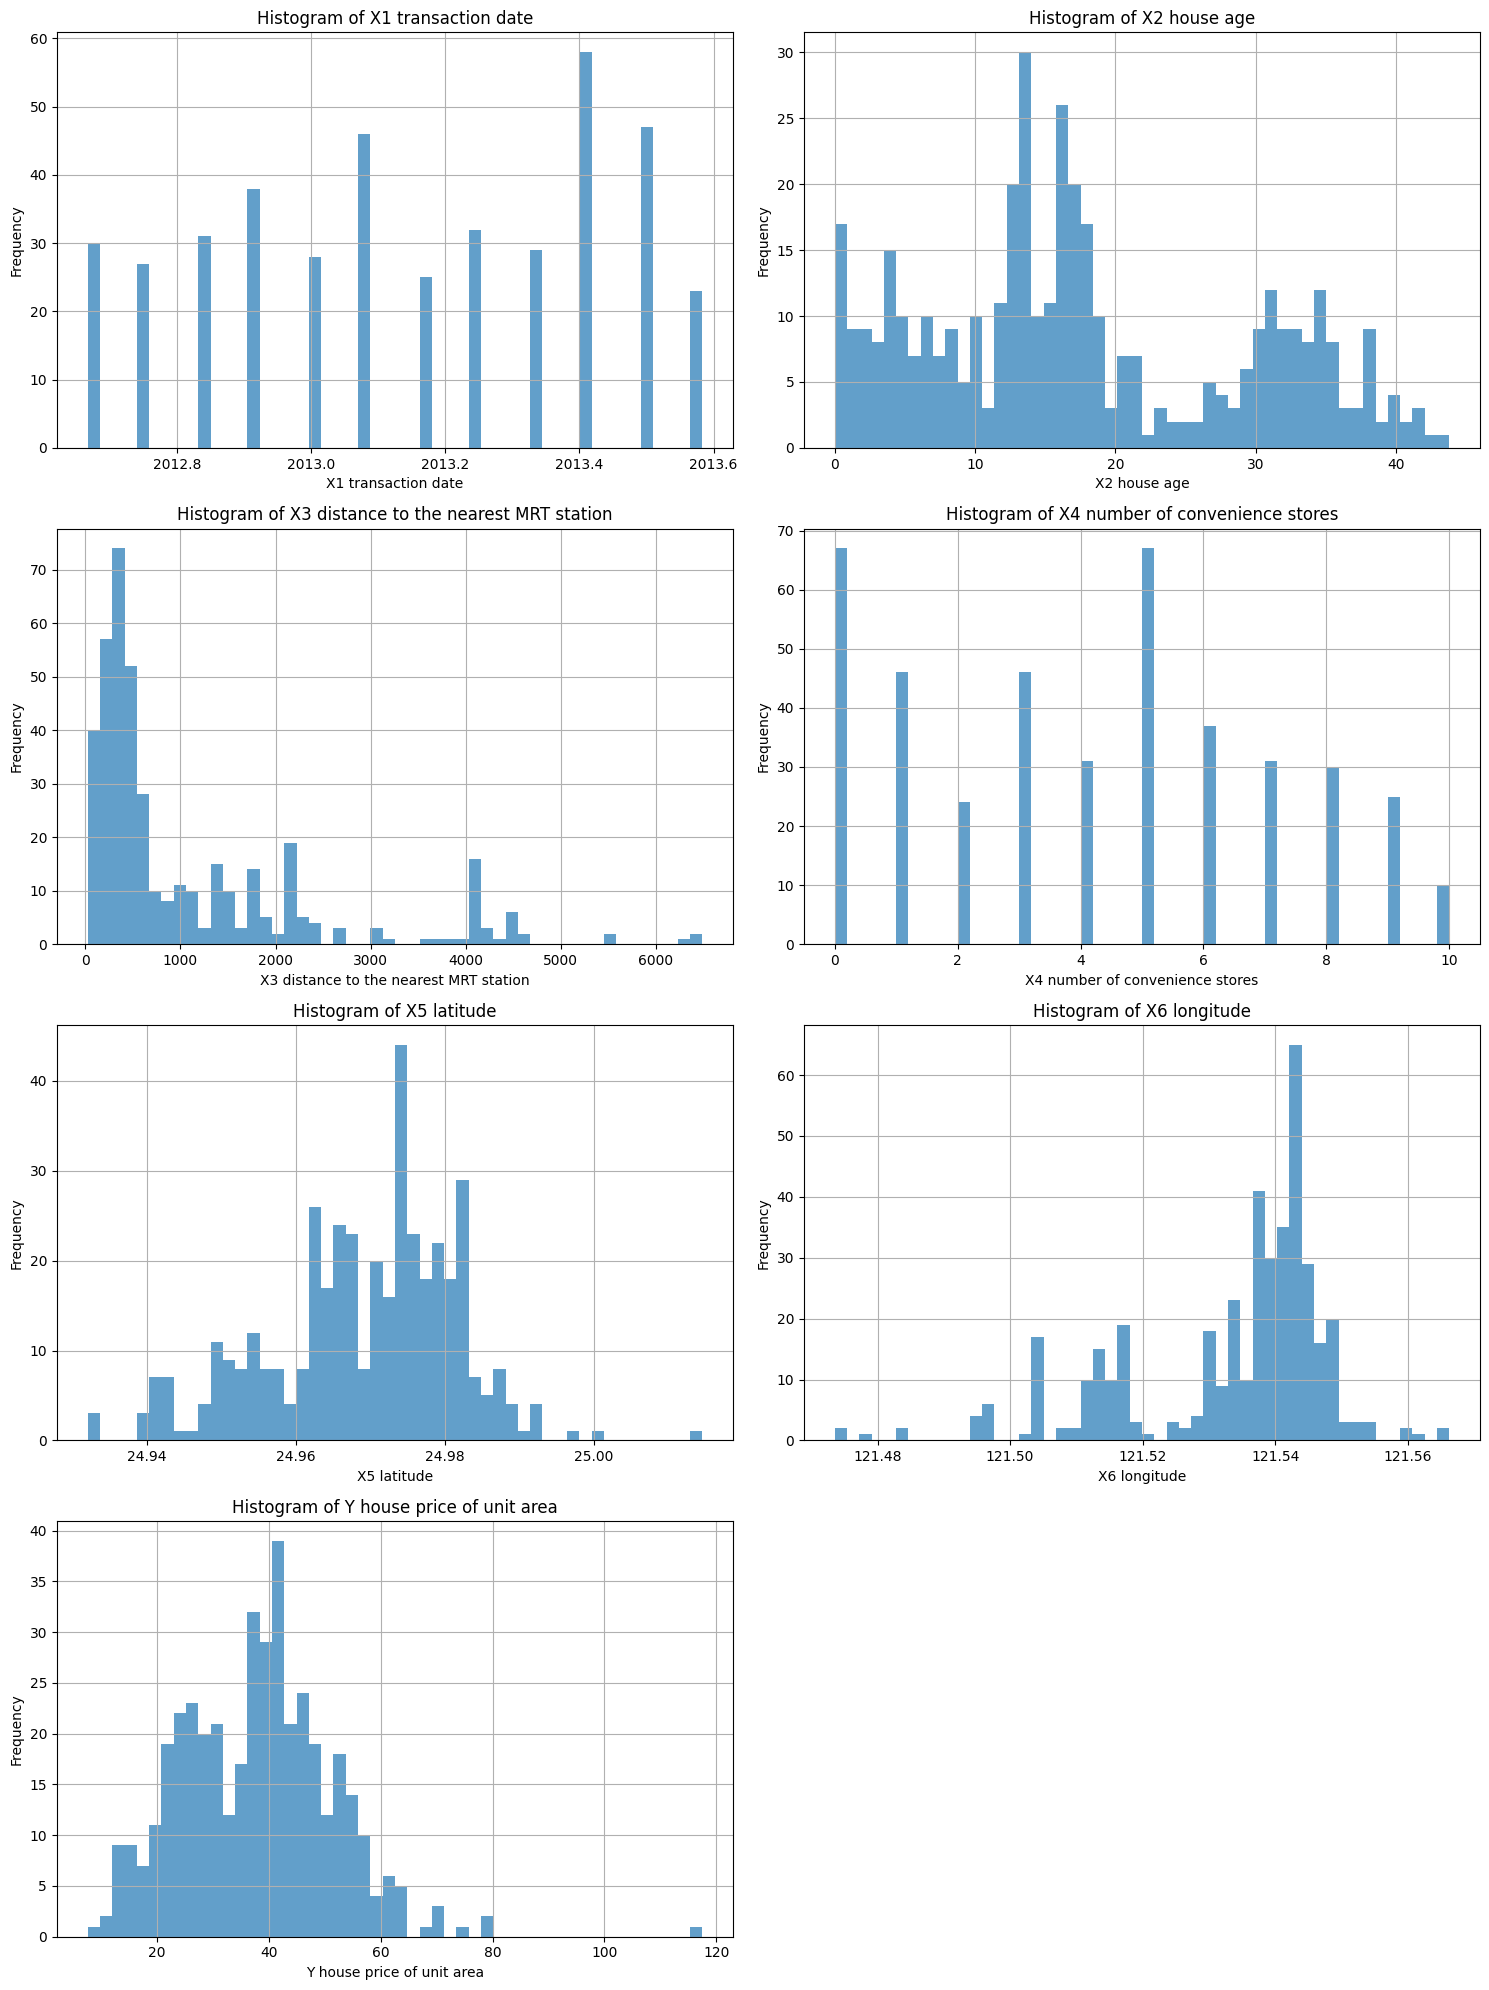

In [9]:
# Number of columns in the DataFrame
num_columns = org_df.shape[1]

# Calculate the number of rows needed
num_rows = (num_columns + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over all columns and create a histogram for each
for i, col in enumerate(org_df.columns):
    org_df[col].hist(ax=axes[i], bins=50, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
columns = org_df.columns.tolist()[2:]
columns

['X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

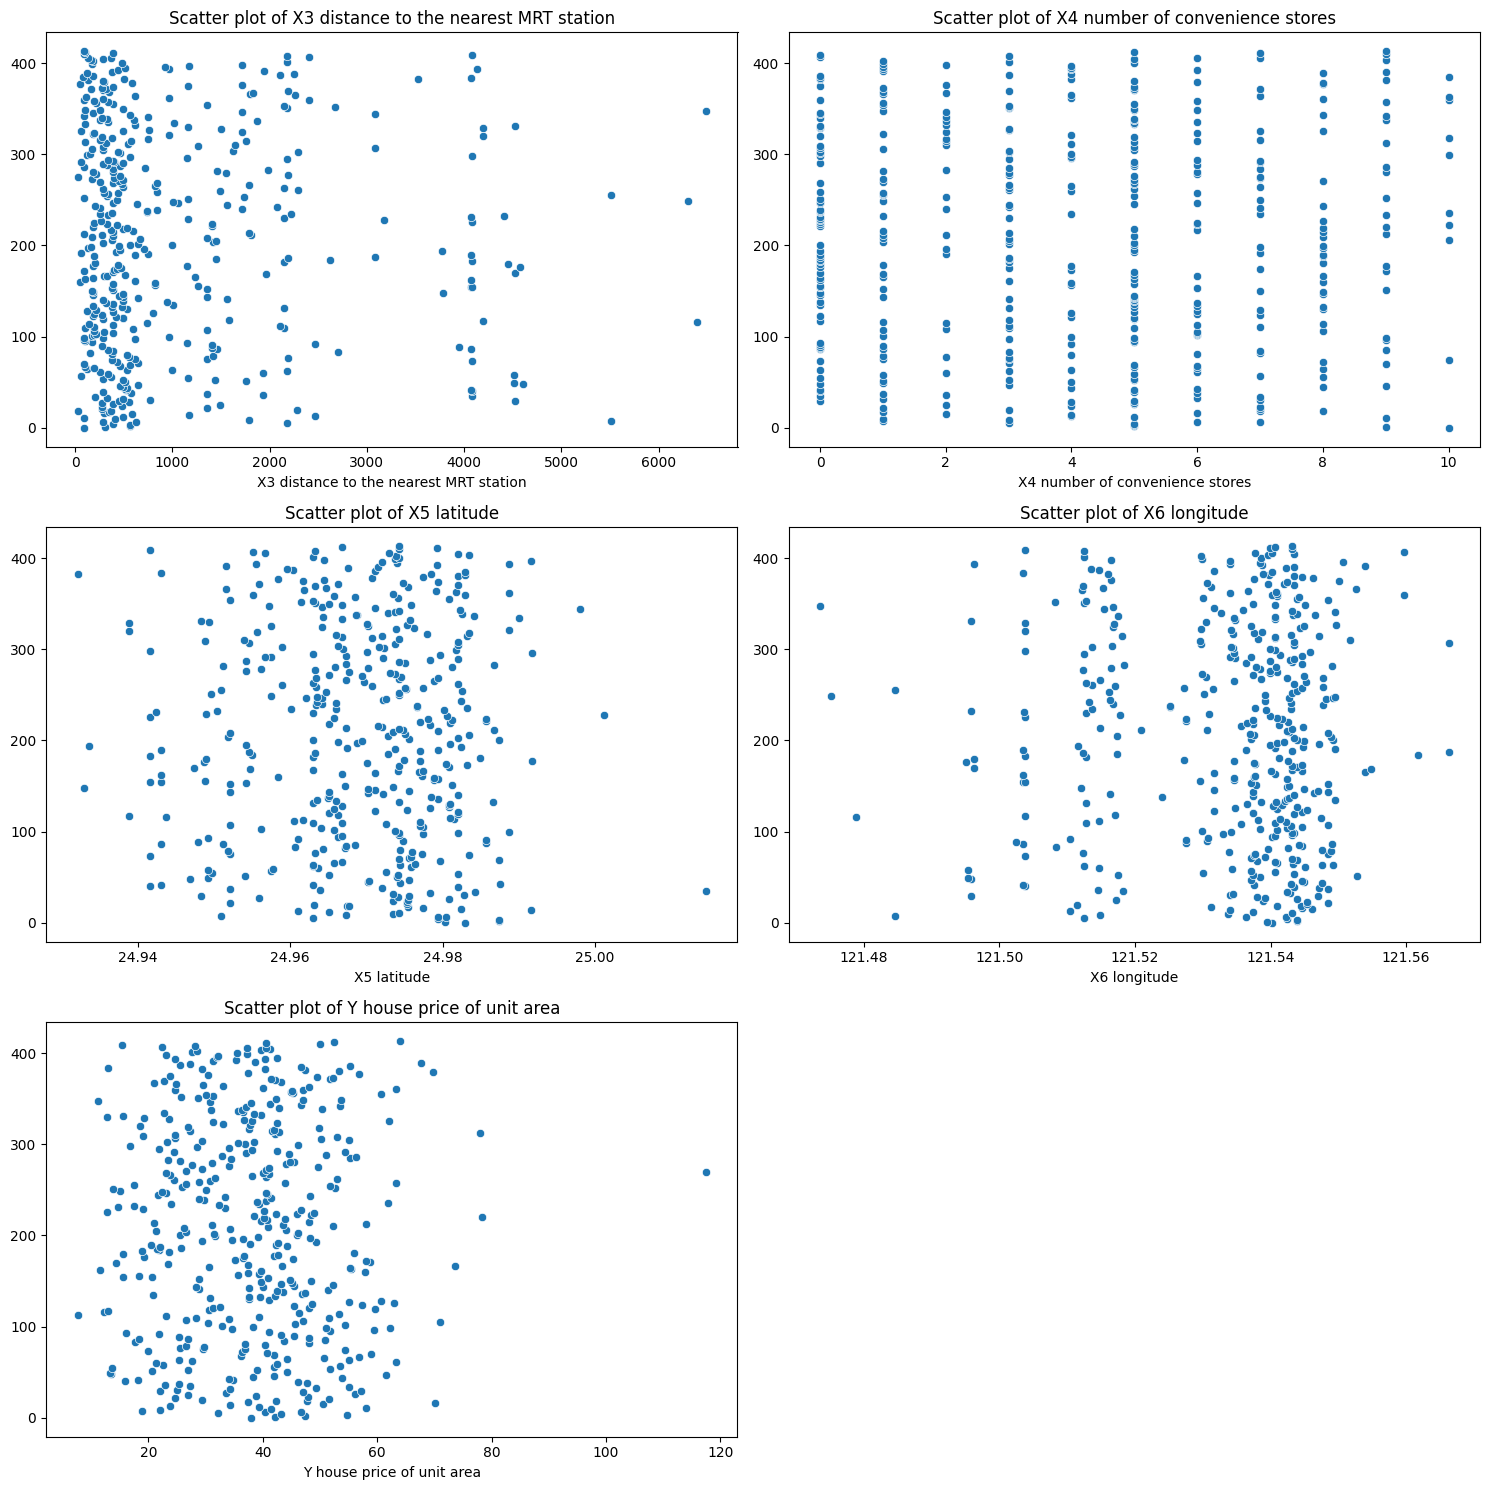

In [11]:
# Number of columns per row
cols_per_row = 2
num_plots = len(columns)
num_rows = (num_plots + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 5))

for i, col in enumerate(columns):
    row = i // cols_per_row
    col_pos = i % cols_per_row
    sns.scatterplot(data=org_df, x=col, y=org_df.index, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Scatter plot of {col}')

# Hide any empty subplots
for j in range(i + 1, num_rows * cols_per_row):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [12]:
columns

['X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [13]:
!pip install geohash2 

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 7.7 MB/s eta 0:00:00
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15544 sha256=712d27c64737aa8fdebe31eb675ac6140b94b13767a4356229644df555ad37c2
  Stored in directory: /root/.cache/pip/wheels/c0/21/8d/fe65503f4f439aef35193e5ec10a14adc945e20ff87eb35895
Successfully built geohash2


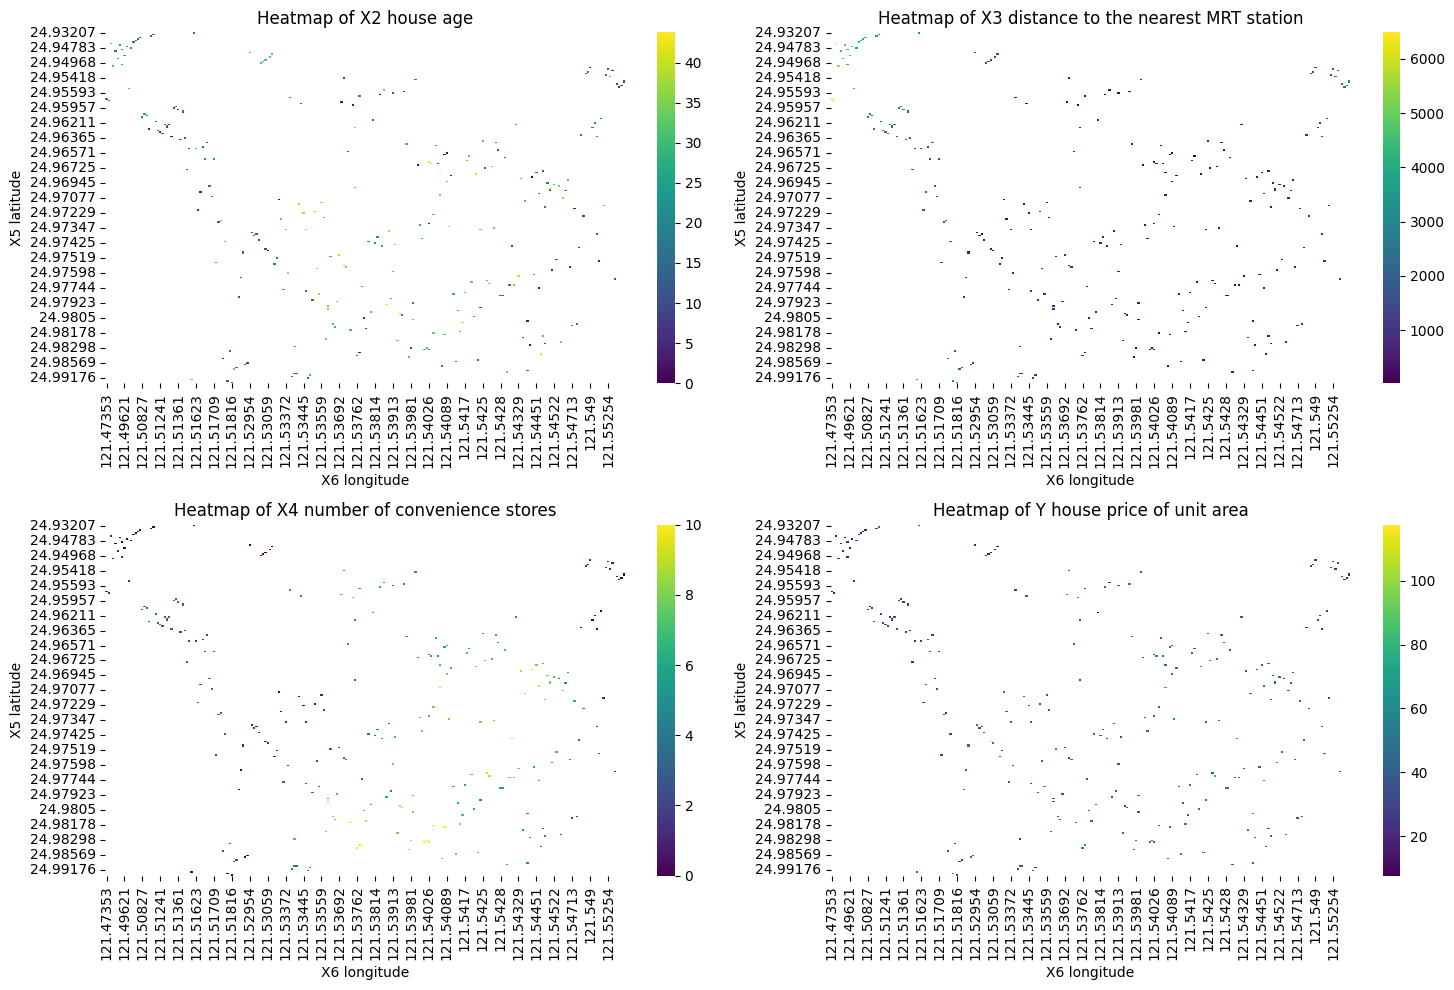

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot
columns_to_plot = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot heat maps
for i, col in enumerate(columns_to_plot):
    pivot_table = org_df.pivot_table(index='X5 latitude', columns='X6 longitude', values=col)
    sns.heatmap(pivot_table, ax=axes[i], cmap='viridis')
    axes[i].set_title(f'Heatmap of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
import plotly.express as px

In [16]:
# Columns to visualize as color intensity in choropleth maps
columns_to_plot = ['X2 house age', 'X3 distance to the nearest MRT station', 
                   'X4 number of convenience stores', 'Y house price of unit area']

# Plotting multiple choropleth-style maps
for column in columns_to_plot:
    fig = px.scatter_mapbox(
        org_df,
        lat="X5 latitude",
        lon="X6 longitude",
        color=column,  # Color intensity based on the column
        hover_name="X1 transaction date",
        color_continuous_scale=px.colors.sequential.Viridis,
        zoom=10,
        mapbox_style="carto-positron",
        title=f"Choropleth-style Map for {column}"
    )
#     fig.update_traces(hoverlabel=dict(font_color="black", font_size=15, ))
    fig.update_traces(hoverlabel=dict(font=dict(color="black", size=15)))
    
    fig.show()

In [17]:
# Columns to visualize as bubble size
columns_to_plot = ['X2 house age', 'X3 distance to the nearest MRT station', 
                   'X4 number of convenience stores', 'Y house price of unit area']

# Plotting multiple bubble maps
for column in columns_to_plot:
    fig = px.scatter_mapbox(
        org_df, 
        lat="X5 latitude", 
        lon="X6 longitude", 
        size=column, 
        color=column, 
        hover_name="X1 transaction date",
        zoom=10, 
        mapbox_style="carto-positron",
        title=f"Bubble Map for {column}"
    )
    fig.show()

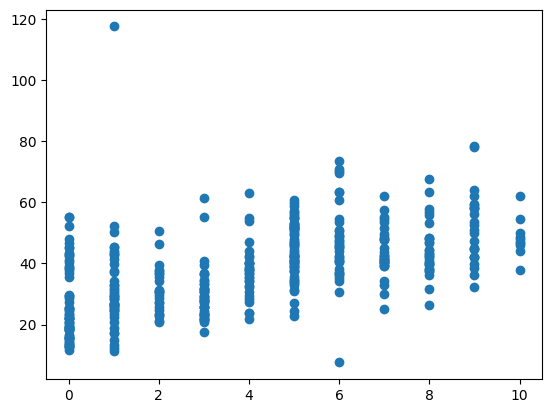

In [18]:
# Create scatter plot
plt.scatter(org_df[[columns[1]]], org_df[[columns[-1]]])
plt.show()

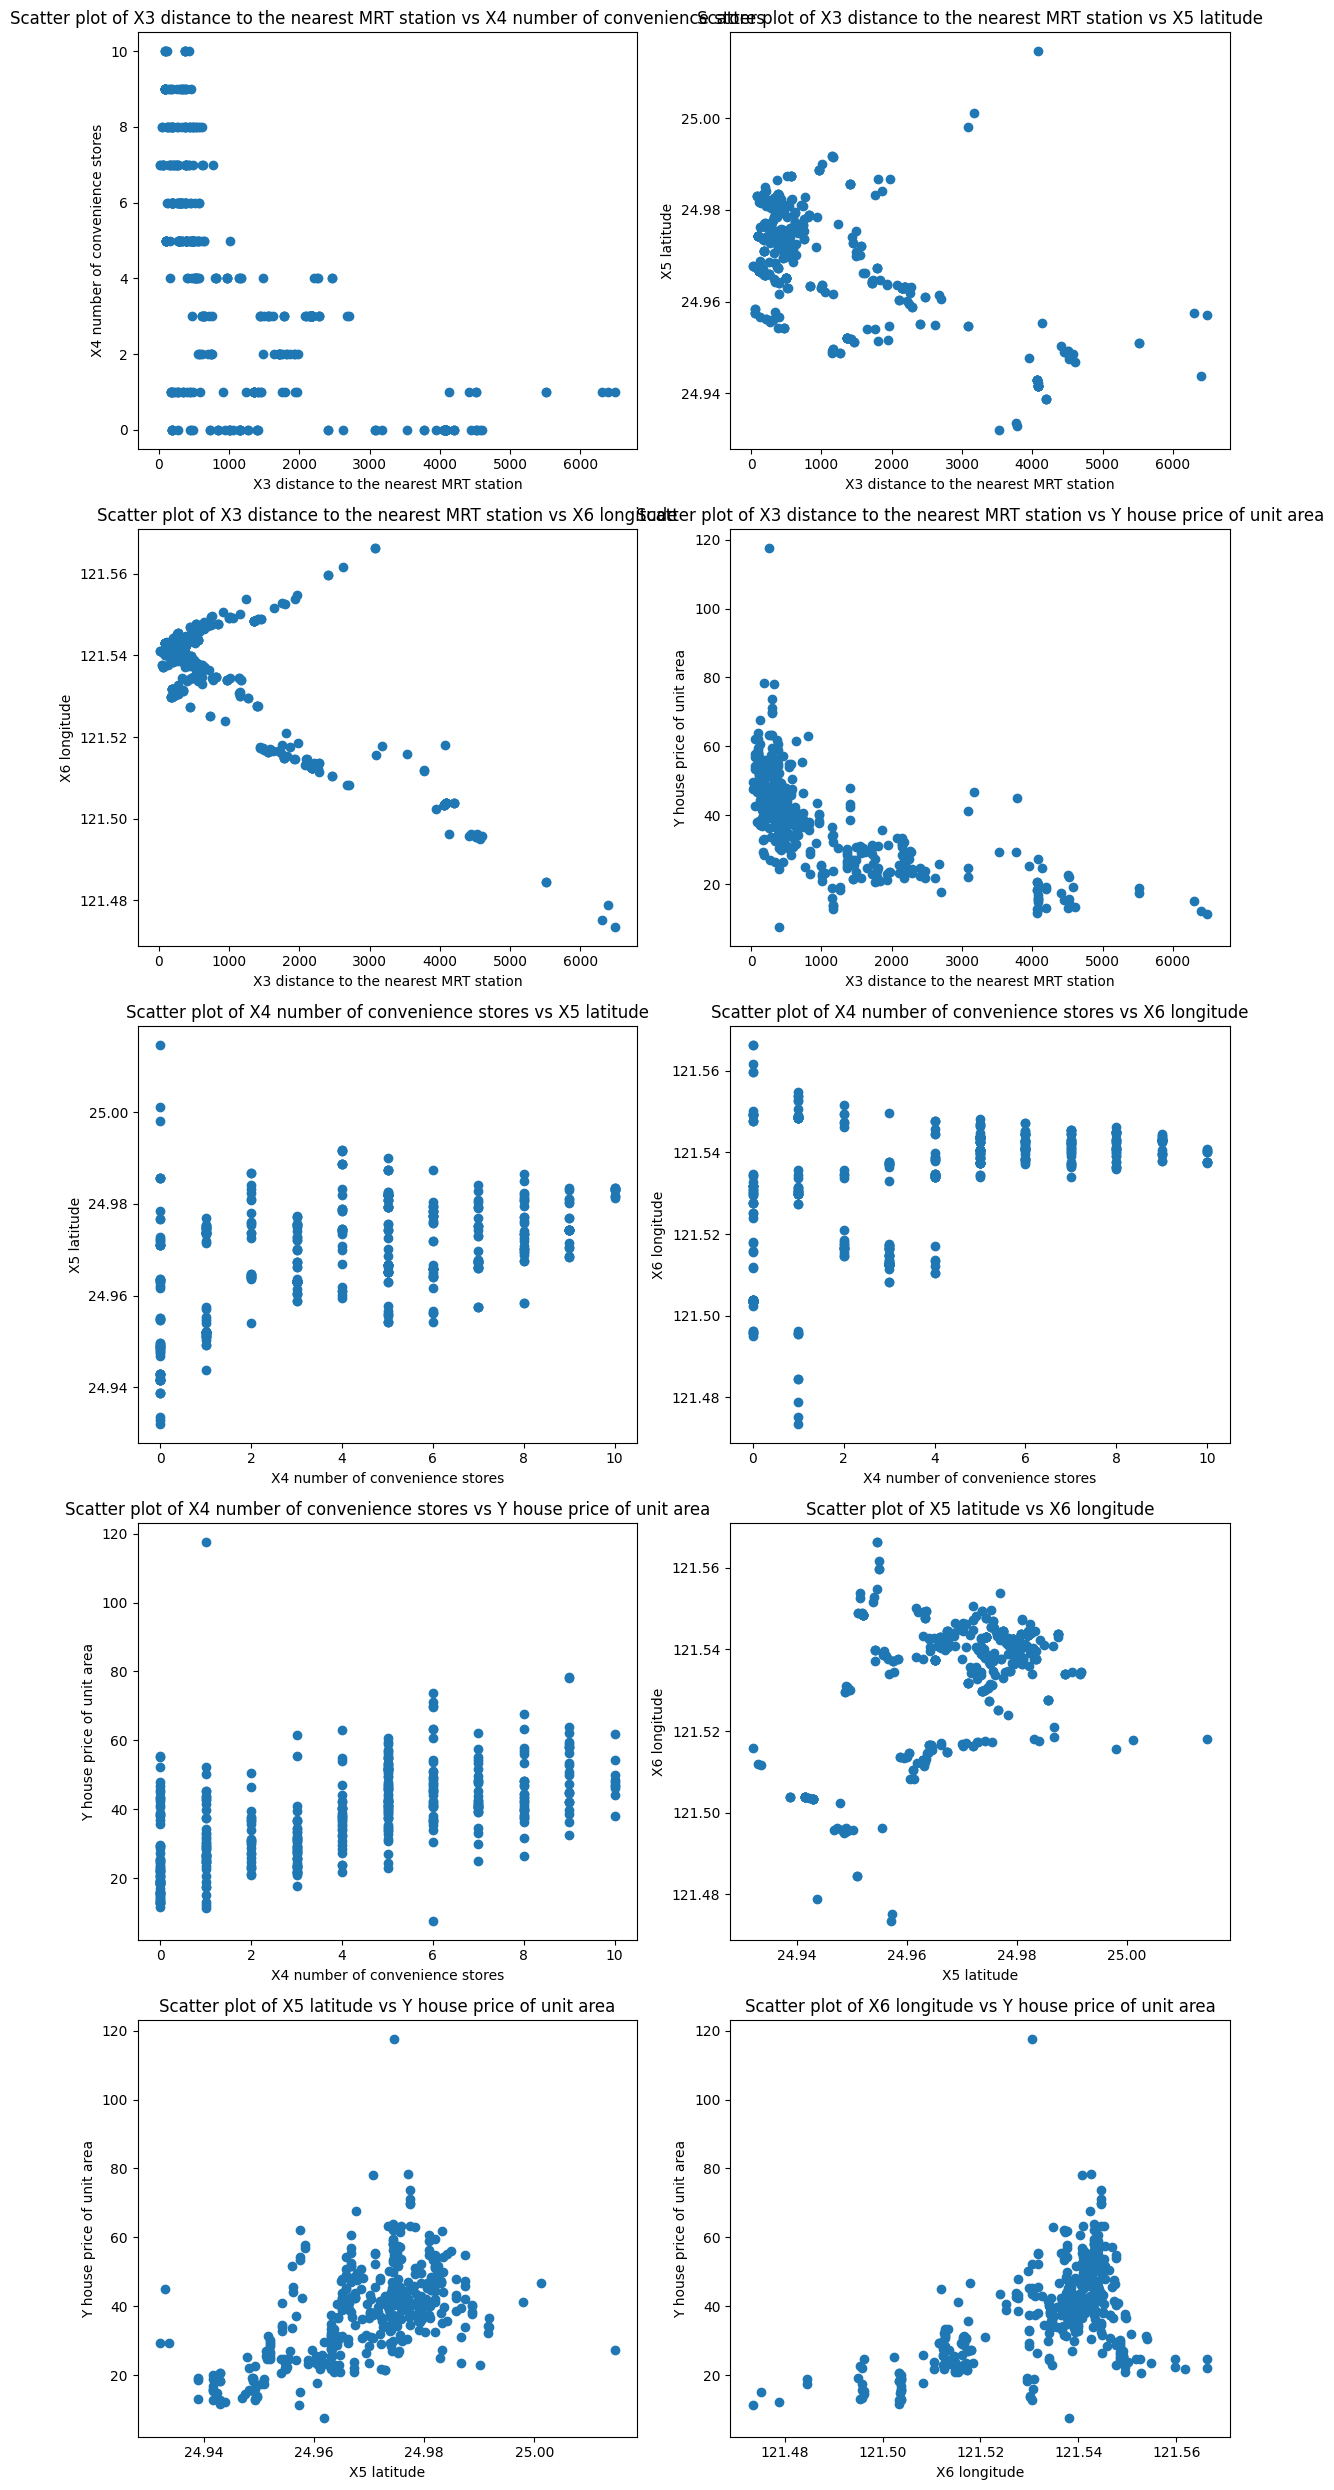

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

def plot_scatter_combinations(df, columns):
    # Generate all combinations of the columns
    combs = list(combinations(columns, 2))
    
    # Calculate the number of rows needed (2 subplots per row)
    n_rows = (len(combs) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for ax, (col1, col2) in zip(axes, combs):
        ax.scatter(df[col1], df[col2])
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_title(f'Scatter plot of {col1} vs {col2}')
    
    # Hide any unused subplots
    for i in range(len(combs), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
plot_scatter_combinations(org_df, columns)

In [20]:
# org_df[columns]

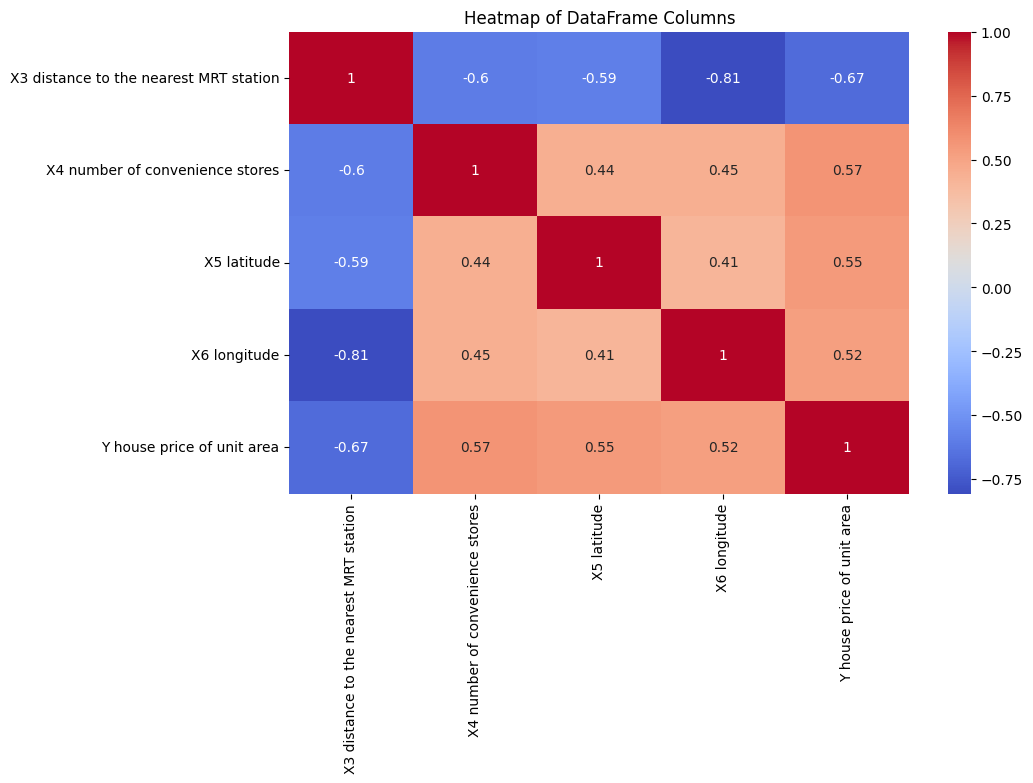

In [21]:
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(org_df[columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of DataFrame Columns')
plt.show()

In [22]:
def count_values_in_columns(df, columns, values):
    for column in columns:
        if column in df.columns:
            counts = df[column].value_counts()
            total_count = df[column].isin(values).sum()
            if total_count > 0:
                print(f"Number of values from the list found in column '{column}': {total_count}")
                for value in values:
                    if value in counts:
                        print(f"Value '{value}' found {counts[value]} times in column '{column}'")

# Example usage
count_values_in_columns(org_df, columns, [0, None, ''])

Number of values from the list found in column 'X4 number of convenience stores': 67
Value '0' found 67 times in column 'X4 number of convenience stores'


In [23]:
org_df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [24]:
import pandas as pd

def print_unique_values(df, columns, print_values=False):
    """
    Prints the number of unique values in specified columns of a DataFrame.
    If print_values is True, also prints the unique values.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    columns (list): List of column names to check.
    print_values (bool): Whether to print the unique values or not.
    """
    for column in columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values.")
        if print_values:
            print(f"Unique values in '{column}': {unique_values}")

# Example usage:
# df = pd.DataFrame({
#     'A': [1, 2, 2, 3],
#     'B': ['a', 'b', 'a', 'c'],
#     'C': [True, False, True, True]
# })
print_unique_values(org_df, org_df.columns, print_values=False)
print()
print_unique_values(org_df, ['X1 transaction date', 'X4 number of convenience stores'],
                    print_values=True)

Column 'X1 transaction date' has 12 unique values.
Column 'X2 house age' has 236 unique values.
Column 'X3 distance to the nearest MRT station' has 259 unique values.
Column 'X4 number of convenience stores' has 11 unique values.
Column 'X5 latitude' has 234 unique values.
Column 'X6 longitude' has 232 unique values.
Column 'Y house price of unit area' has 270 unique values.

Column 'X1 transaction date' has 12 unique values.
Unique values in 'X1 transaction date': [2012.917 2013.583 2013.5   2012.833 2012.667 2013.417 2013.083 2013.333
 2013.25  2012.75  2013.    2013.167]
Column 'X4 number of convenience stores' has 11 unique values.
Unique values in 'X4 number of convenience stores': [10  9  5  3  7  6  1  4  2  8  0]


In [25]:
import pandas as pd
from scipy.stats import shapiro

def check_normality(df):
    normality_results = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            stat, p_value = shapiro(df[column].dropna())
            normality_results[column] = p_value
            if p_value > 0.05:
                print(f'Column: {column}, p-value: {p_value} (Normal)')
            else:
                print(f'Column: {column}, p-value: {p_value} (Not Normal)')
        else:
            print(f'Column: {column} is not numeric and will be skipped.')
    return normality_results


check_normality(org_df)

Column: X1 transaction date, p-value: 1.8209864330881844e-12 (Not Normal)
Column: X2 house age, p-value: 4.798332672043144e-11 (Not Normal)
Column: X3 distance to the nearest MRT station, p-value: 4.855539011876785e-25 (Not Normal)
Column: X4 number of convenience stores, p-value: 3.460724154311165e-12 (Not Normal)
Column: X5 latitude, p-value: 6.894018077636537e-07 (Not Normal)
Column: X6 longitude, p-value: 4.5477839356985316e-18 (Not Normal)
Column: Y house price of unit area, p-value: 5.411470648889301e-07 (Not Normal)


{'X1 transaction date': 1.8209864330881844e-12,
 'X2 house age': 4.798332672043144e-11,
 'X3 distance to the nearest MRT station': 4.855539011876785e-25,
 'X4 number of convenience stores': 3.460724154311165e-12,
 'X5 latitude': 6.894018077636537e-07,
 'X6 longitude': 4.5477839356985316e-18,
 'Y house price of unit area': 5.411470648889301e-07}

In [26]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# help(IsolationForest())

In [27]:


def remove_outliers(df, columns, method):
    # Select the data from the specified columns
    data = df[columns]
    
    # Initialize the model based on the method
    if method == 'one_class_svm':
        model = OneClassSVM(gamma='auto', nu=0.7, kernel='rbf')
    elif method == 'isolation_forest':
        model = IsolationForest(contamination='auto')
    elif method == 'local_outlier_factor':
        model = LocalOutlierFactor(novelty=True)
    else:
        raise ValueError("Method must be 'one_class_svm', 'isolation_forest', or 'local_outlier_factor'")
    
    # Fit the model and predict outliers
    if method == 'local_outlier_factor':
        model.fit(data)
        outliers = model.predict(data) == -1
    else:
        outliers = model.fit_predict(data) == -1
    
    # Remove the outliers
    df_cleaned = df[~outliers]
    
    return df_cleaned

In [28]:
remove_outliers(org_df,
               ['X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 
       'Y house price of unit area'],
                'one_class_svm'
               )

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
...,...,...,...,...,...,...,...
405,2012.667,23.0,130.99450,6,24.95663,121.53765,37.2
406,2013.167,1.9,372.13860,7,24.97293,121.54026,40.5
408,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [29]:
org_df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [30]:
org_df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [31]:
# pd.to_datetime(org_df['X1 transaction date'])

In [32]:
remove_outliers(org_df,
               ['X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 
       'Y house price of unit area'],
                'one_class_svm'
               )

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
...,...,...,...,...,...,...,...
405,2012.667,23.0,130.99450,6,24.95663,121.53765,37.2
406,2013.167,1.9,372.13860,7,24.97293,121.54026,40.5
408,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [33]:
remove_outliers(org_df,
               ['X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 
       'Y house price of unit area'],
                'isolation_forest'
               )

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
...,...,...,...,...,...,...,...
408,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [34]:
remove_outliers(org_df,
               ['X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 
       'Y house price of unit area'],
                'local_outlier_factor'
               )

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names



,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [35]:
org_df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [36]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

rob_df = pd.DataFrame(scaler.fit_transform(org_df[[ 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', ]]), columns=[ 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores',])


rob_df[ 'Y house price of unit area'] = org_df[ 'Y house price of unit area']
rob_df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,0.831373,-0.349673,1.2,37.9
1,0.177778,-0.159351,1.0,42.2
2,-0.146405,0.059876,0.2,47.3
3,-0.146405,0.059876,0.2,54.8
4,-0.580392,-0.087268,0.2,43.1
...,...,...,...,...
409,-0.125490,3.081481,-0.8,15.4
410,-0.549020,-0.344885,1.0,50.0
411,0.141176,-0.086923,0.6,40.6
412,-0.418301,-0.332563,0.2,52.5


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming org_df is your original DataFrame
# Define the feature matrix x and the target vector y
x = rob_df[[
    'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 
#             'X1 transaction date'
       ]]
y = rob_df['Y house price of unit area']

# First, split the data into training+validation (85%) and test (15%) sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.15, 
                                                            random_state=42, 
#                                                             stratify=y
                                                           )

# Then, split the training+validation set into training (70%) and validation (15%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, 
                                                  test_size=0.1765, random_state=42, 
#                                                   stratify=y_train_val
                                                 )

print(f"Training set size: {x_train.shape[0]}")
print(f"Validation set size: {x_val.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 289
Validation set size: 62
Test set size: 63


In [38]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming x_train, y_train, x_test, y_test are already defined
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, min_samples_split=55,
                                     min_samples_leaf=1,
#                                      max_leaf_nodes=5,
                                     criterion=  'poisson', # 'friedman_mse', # 'absolute_error',
                                     max_depth=None, max_features= None, # 'auto',
                                    min_weight_fraction_leaf=0.1,
#                                      min_impurity_decrease=0.00001
                                     ccp_alpha=0.01
                                    )
dt_regressor.fit(x_train, y_train)
y_pred_dt = dt_regressor.predict(x_test)
dt_r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree R²: {dt_r2:.2f}")



Decision Tree R²: 0.74


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming org_df is your original DataFrame
# Define the feature matrix x and the target vector y
x = org_df[[
    'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 
#             'X1 transaction date'
       ]]
y = org_df['Y house price of unit area']

# First, split the data into training+validation (85%) and test (15%) sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.15, 
                                                            random_state=42, 
#                                                             stratify=y
                                                           )

# Then, split the training+validation set into training (70%) and validation (15%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, 
                                                  test_size=0.1765, random_state=42, 
#                                                   stratify=y_train_val
                                                 )

print(f"Training set size: {x_train.shape[0]}")
print(f"Validation set size: {x_val.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 289
Validation set size: 62
Test set size: 63


In [40]:
x_train

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
194,15.2,3771.8950,0
257,17.3,444.1334,1
83,25.3,2707.3920,3
59,13.3,336.0532,5
197,34.4,126.7286,8
...,...,...,...
109,4.0,2147.3760,3
81,30.8,377.7956,6
295,18.2,2179.5900,3
270,10.8,252.5822,1


In [41]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming x_train, y_train, x_test, y_test are already defined
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, min_samples_split=55,
                                     min_samples_leaf=1,
#                                      max_leaf_nodes=5,
                                     criterion=  'poisson', # 'friedman_mse', # 'absolute_error',
                                     max_depth=None, max_features= None, # 'auto',
                                    min_weight_fraction_leaf=0.1,
#                                      min_impurity_decrease=0.00001
                                     ccp_alpha=0.01
                                    )
dt_regressor.fit(x_train, y_train)
y_pred_dt = dt_regressor.predict(x_test)
dt_r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree R²: {dt_r2:.2f}")



Decision Tree R²: 0.74


In [42]:
y_test

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
       ... 
77     25.6
39     46.2
401    27.7
25     27.0
155    15.6
Name: Y house price of unit area, Length: 63, dtype: float64

In [43]:
y_pred_dt

array([53.01692308, 38.29620253, 53.01692308, 46.66590909, 23.85789474,
       38.29620253, 46.66590909, 46.66590909, 23.85789474, 53.01692308,
       23.85789474, 30.65882353, 30.65882353, 23.85789474, 38.29620253,
       23.85789474, 38.29620253, 53.01692308, 23.85789474, 38.29620253,
       20.07241379, 23.85789474, 53.01692308, 46.66590909, 20.07241379,
       46.66590909, 20.07241379, 53.01692308, 46.66590909, 38.29620253,
       20.07241379, 30.65882353, 38.29620253, 23.85789474, 46.66590909,
       38.29620253, 53.01692308, 20.07241379, 38.29620253, 46.66590909,
       38.29620253, 38.29620253, 46.66590909, 38.29620253, 38.29620253,
       53.01692308, 38.29620253, 23.85789474, 53.01692308, 46.66590909,
       53.01692308, 53.01692308, 38.29620253, 38.29620253, 38.29620253,
       20.07241379, 38.29620253, 23.85789474, 23.85789474, 46.66590909,
       30.65882353, 23.85789474, 20.07241379])

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 5.109480848854714
MSE: 46.01243512452218
R²: 0.7413005222012282


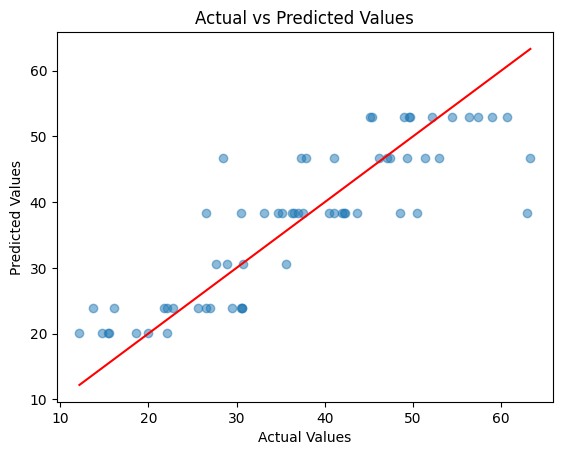

In [45]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.show()


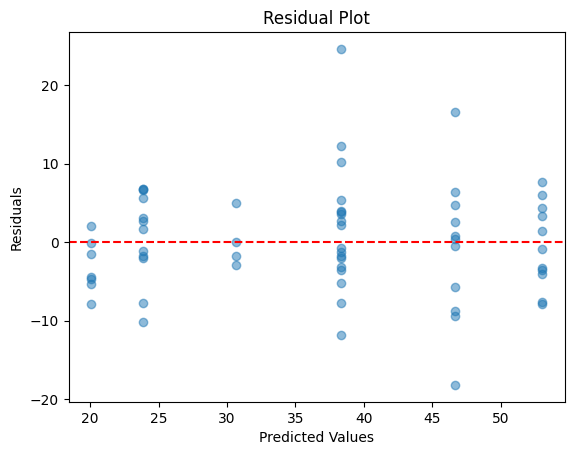

In [46]:
residuals = y_test - y_pred_dt

plt.scatter(y_pred_dt, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [47]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression R²: {lr_r2:.2f}")

Linear Regression R²: 0.63


In [48]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")

Ridge Regression MSE: 66.30


In [49]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")


Lasso Regression MSE: 66.81


In [50]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(x_train, y_train)
y_pred_en = elastic_net_model.predict(x_test)
en_mse = mean_squared_error(y_test, y_pred_en)
print(f"Elastic Net Regression MSE: {en_mse:.2f}")


Elastic Net Regression MSE: 66.89


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(x_train, y_train)
y_pred_poly = poly_model.predict(x_test)
poly_mse = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression MSE: {poly_mse:.2f}")


Polynomial Regression MSE: 57.62


In [52]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)
svr_mse = mean_squared_error(y_test, y_pred_svr)
print(f"Support Vector Regression MSE: {svr_mse:.2f}")


Support Vector Regression MSE: 70.36


In [53]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [54]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 5.617397787204155
MSE: 58.60171856593545
R²: 0.6506806878281706


In [55]:
import pandas as pd
from sklearn.linear_model import Lars
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Least Angle Regression model
lars_model = Lars()
lars_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lars = lars_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lars)
mse = mean_squared_error(y_test, y_pred_lars)
r2 = r2_score(y_test, y_pred_lars)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 5.350138374356292
MSE: 54.580945200862885
R²: 0.6746481382828131


In [56]:
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Bayesian Ridge Regression model
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bayesian = bayesian_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_bayesian)
mse = mean_squared_error(y_test, y_pred_bayesian)
r2 = r2_score(y_test, y_pred_bayesian)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 5.675023689715962
MSE: 59.32157547371021
R²: 0.6463896887578431


In [57]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Add a constant to the predictor variables (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Generalized Linear Model
glm_model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
glm_results = glm_model.fit()

# Predict on the test set
y_pred_glm = glm_results.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_glm)
mse = mean_squared_error(y_test, y_pred_glm)
r2 = r2_score(y_test, y_pred_glm)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 5.350138374356242
MSE: 54.58094520085734
R²: 0.6746481382828461


In [58]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the SGD Regressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)

# Predict on the test set
y_pred_sgd = sgd_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_sgd)
mse = mean_squared_error(y_test, y_pred_sgd)
r2 = r2_score(y_test, y_pred_sgd)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 4165963818870882.0
MSE: 4.163834505829441e+31
R²: -2.482022440924044e+29


In [59]:
import pandas as pd
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Passive Aggressive Regressor model
pa_model = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3, random_state=42)
pa_model.fit(X_train, y_train)

# Predict on the test set
y_pred_pa = pa_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_pa)
mse = mean_squared_error(y_test, y_pred_pa)
r2 = r2_score(y_test, y_pred_pa)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 37.53163741244498
MSE: 2575.315361006488
R²: -14.351211748511162


In [60]:
import pandas as pd
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the RANSAC Regressor model
ransac_model = RANSACRegressor(base_estimator=LinearRegression(), min_samples=50, max_trials=100, random_state=42)
ransac_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ransac = ransac_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_ransac)
mse = mean_squared_error(y_test, y_pred_ransac)
r2 = r2_score(y_test, y_pred_ransac)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 5.279130660161292
MSE: 56.231868038186704
R²: 0.664807143102205


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ransac.py:343: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.



In [61]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define and fit the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 4.812176692683293
MSE: 41.85048282419938
R²: 0.7505332227115561


In [62]:
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Kernel Ridge Regression model
krr_model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.1)
krr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_krr = krr_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_krr)
mse = mean_squared_error(y_test, y_pred_krr)
r2 = r2_score(y_test, y_pred_krr)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 22.137818319898695
MSE: 708.0157601875352
R²: -3.220415107404227


In [63]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the SVM Regressor model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_svm)
mse = mean_squared_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 6.0505889330573766
MSE: 64.32659316483725
R²: 0.616555250791571


In [64]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the SGD Regressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)

# Predict on the test set
y_pred_sgd = sgd_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_sgd)
mse = mean_squared_error(y_test, y_pred_sgd)
r2 = r2_score(y_test, y_pred_sgd)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 3948473960316854.5
MSE: 3.9309173825340874e+31
R²: -2.343182742543817e+29


In [65]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the k-NN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 4.943132530120483
MSE: 54.35606746987952
R²: 0.6759886132079893


In [66]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Gaussian Process Regressor model
kernel = 1.0 * RBF(length_scale=1.0)
gpr_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gpr = gpr_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_gpr)
mse = mean_squared_error(y_test, y_pred_gpr)
r2 = r2_score(y_test, y_pred_gpr)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


/opt/conda/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MAE: 27.41410458232736
MSE: 1027.627608915374
R²: -5.125591165235308


/opt/conda/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.



In [67]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the PLS Regression model
pls_model = PLSRegression(n_components=2)
pls_model.fit(X_train, y_train)

# Predict on the test set
y_pred_pls = pls_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_pls)
mse = mean_squared_error(y_test, y_pred_pls)
r2 = r2_score(y_test, y_pred_pls)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 5.326365113306336
MSE: 54.164464758318516
R²: 0.6771307388836628


In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 5.595180722891567
MSE: 58.828433734939765
R²: 0.6493292601084119


In [69]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Gradient Boosted Tree Regressor model
gbt_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbt = gbt_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_gbt)
mse = mean_squared_error(y_test, y_pred_gbt)
r2 = r2_score(y_test, y_pred_gbt)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 3.9999027853952085
MSE: 32.580426729155455
R²: 0.8057911519695788


In [70]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 4.236691241155093
MSE: 34.60981792762854
R²: 0.7936941426168487


In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor(n_neighbors=5)

# Define and fit the Voting Regressor model
voting_model = VotingRegressor(estimators=[('lr', model1), ('rf', model2), ('knn', model3)])
voting_model.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_voting)
mse = mean_squared_error(y_test, y_pred_voting)
r2 = r2_score(y_test, y_pred_voting)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 3.9922640735199075
MSE: 35.695330263889055
R²: 0.7872235060564223


In [72]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Bagging Regressor model
base_model = DecisionTreeRegressor(random_state=42)
bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_bagging)
mse = mean_squared_error(y_test, y_pred_bagging)
r2 = r2_score(y_test, y_pred_bagging)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



MAE: 4.227055373876455
MSE: 34.30051210942444
R²: 0.7955378853996518


In [73]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Bagging Regressor model
base_model = DecisionTreeRegressor(random_state=42)
bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_bagging)
mse = mean_squared_error(y_test, y_pred_bagging)
r2 = r2_score(y_test, y_pred_bagging)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



MAE: 4.227055373876455
MSE: 34.30051210942444
R²: 0.7955378853996518


In [74]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the AdaBoost Regressor model
base_model = DecisionTreeRegressor(max_depth=4)
ada_model = AdaBoostRegressor(base_estimator=base_model, n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_ada)
mse = mean_squared_error(y_test, y_pred_ada)
r2 = r2_score(y_test, y_pred_ada)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



MAE: 4.331623067434348
MSE: 37.9805927002428
R²: 0.7736012724097926


In [75]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming org_df is your dataframe
# org_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Define predictor and response variables
X = org_df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = org_df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the AdaBoost Regressor model
base_model = DecisionTreeRegressor(max_depth=4)
ada_model = AdaBoostRegressor(base_estimator=base_model, n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_ada)
mse = mean_squared_error(y_test, y_pred_ada)
r2 = r2_score(y_test, y_pred_ada)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



MAE: 4.331623067434348
MSE: 37.9805927002428
R²: 0.7736012724097926
